### Импортируем все необходимое

In [ ]:
#общий импорт
import pandas as pd #для работы с таблицами
import numpy as np #для работы с массивами
import matplotlib.pyplot as plt #для работы с графиками
import seaborn as sns #для визуализации статистических взаимосвязей

#препроцессинг
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder #для кодирования признаков
from sklearn.preprocessing import StandardScaler #для стандартизации признаков
from sklearn.model_selection import (train_test_split,  # для разделения данных на тренировочную и тестовую выборки
                                     GridSearchCV) #для подбора гиперпараметров методом сетки


#ML регрессия
from sklearn.linear_model import LinearRegression # линейная регрессия
from sklearn.neighbors import KNeighborsRegressor # метод ближайших соседей
from sklearn.tree import DecisionTreeRegressor # решающее дерево
from sklearn.svm import SVR # метод опорных векторов

#метрики оценки качества моделей регрессии
from sklearn.metrics import (mean_absolute_error,
                             mean_squared_error,
                             r2_score)

import pickle #для сохранения модели


###Загружаем датасет

In [ ]:
!git clone https://github.com/romashka19yyy-prog/VKR

fatal: destination path 'VKR' already exists and is not an empty directory.


In [ ]:
#путь до датасета
path ="/content/VKR/X_bp.csv"

In [ ]:
data = pd.read_csv(path, index_col=0)
data.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


#Описательный анализ

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1022
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10)
memory usage: 87.9 KB


In [ ]:
data.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628


In [ ]:
#размерность
data.shape

(1023, 10)

##Корреляция

<Axes: >

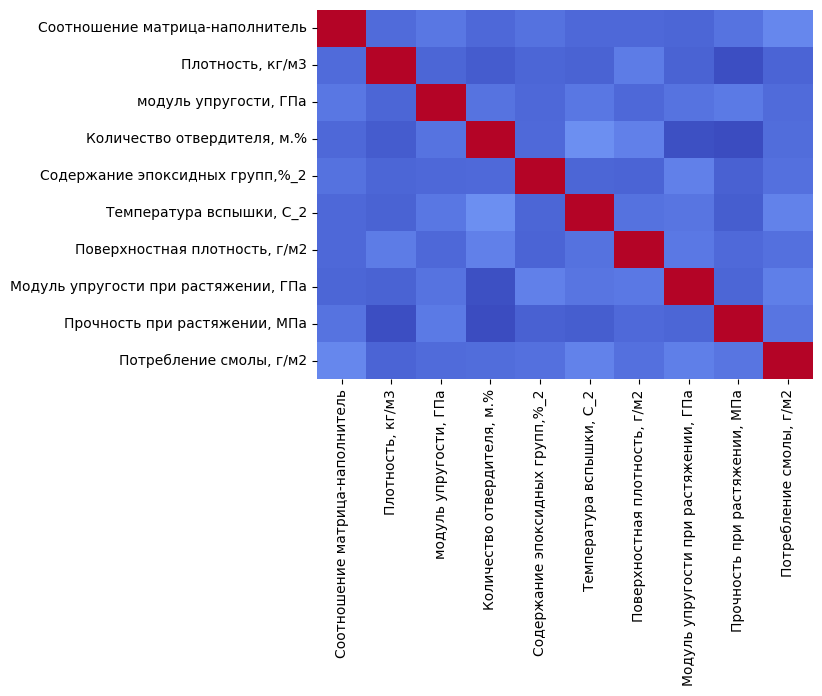

In [ ]:
sns.heatmap(data.corr(), cmap = 'coolwarm',  cbar = False)

In [ ]:
#TOP K коррелируемых признаков
k = 10
corrmat = data.corr()
top_corr_features = corrmat.nlargest(k, 'Модуль упругости при растяжении, ГПа')[['Модуль упругости при растяжении, ГПа']]
top_corr_features

,"Модуль упругости при растяжении, ГПа"
"Модуль упругости при растяжении, ГПа",1.000000
"Содержание эпоксидных групп,%_2",0.056828
"Потребление смолы, г/м2",0.050938
"Поверхностная плотность, г/м2",0.036702
"Температура вспышки, С_2",0.028414
"модуль упругости, ГПа",0.023267
Соотношение матрица-наполнитель,-0.008411
"Прочность при растяжении, МПа",-0.009009
"Плотность, кг/м3",-0.017602
"Количество отвердителя, м.%",-0.065929


In [ ]:
cols = top_corr_features.index.to_list() #выдергиваем имена колонок

<Axes: >

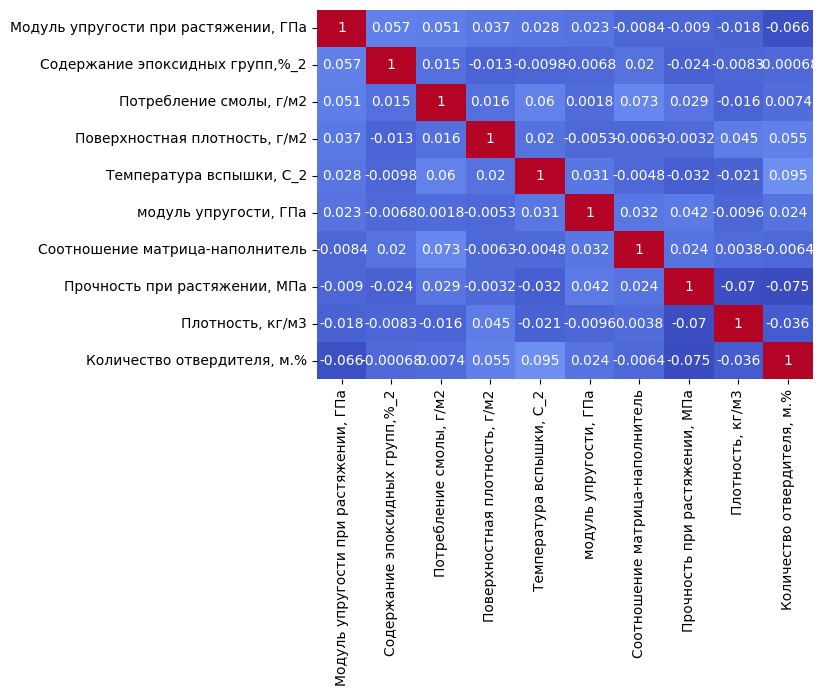

In [ ]:
sns.heatmap(data[cols].corr(), cmap = 'coolwarm',  cbar = False, annot = True)

##X_train y_train, X_test y_test Готовим выборки

In [ ]:
y = np.array(data['Модуль упругости при растяжении, ГПа'])
X = np.array(data.drop('Модуль упругости при растяжении, ГПа', axis = 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(818, 9)
(818,)
(205, 9)
(205,)


##StandardScaler

In [ ]:
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
X_train[:1]

array([[   3.325, 1884.474,  517.797,  106.075,   20.41 ,  297.453,
         730.29 , 2012.973,  247.845]])

#ML

##Метрики (get_metrics)

In [ ]:
def get_metrics_regression(model_list,
                           model_list_name,
                           X_test, y_test):

  #список с сметриками
  mean_absolute_error_list = []
  mean_squared_error_list = []
  r2_score_list = []

  #цикл по метрикам регрессии
  for i in range(len(model_list)):
    y_pred = model_list[i].predict(X_test)
    print(f'Метрики для модели {model_list_name[i]}')

    print('mae = ', mean_absolute_error(y_test, y_pred))
    print('mse = ', mean_squared_error(y_test, y_pred))
    print('r2', r2_score(y_test, y_pred))

    mean_absolute_error_list.append(round(mean_absolute_error(y_test, y_pred), 3))
    mean_squared_error_list.append(round(mean_squared_error(y_test, y_pred), 3))
    r2_score_list.append(round(r2_score(y_test, y_pred),3))

  #итоговая таблица для сравнения
  result_table = pd.DataFrame(index = model_list_name)
  result_table['mae'] = mean_absolute_error_list
  result_table['mse'] = mean_squared_error_list
  result_table['r2'] = r2_score_list

  return result_table


##Регрессия

In [ ]:
lr = LinearRegression() #линейная регрессия

lr.fit(X_train, y_train) #обучение

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test[:3])
print('y_pred =', y_pred)
print('y_test =', y_test[:3])

y_pred = [73.658 73.432 73.515]
y_test = [77.181 77.171 73.79 ]


In [ ]:
mean_absolute_error(y_test[:3], y_pred)

2.512033102376227

In [ ]:
lr1 = LinearRegression() #линейная регрессия
lr1.fit(X_train_scaled, y_train) #обучение на данных которые прошли трансформацию масштабирование

LinearRegression()

In [ ]:
y_pred = lr1.predict(X_test_scaled[:5])
print('y_pred =', y_pred)
print('y_test =', y_test[:5])
mean_absolute_error(y_test[:5], y_pred)

y_pred = [73.658 73.432 73.515 73.783 73.049]
y_test = [77.181 77.171 73.79  70.948 72.695]


2.1452099390518584

##Линейная регрессия

In [ ]:
lr = LinearRegression() #линейная регрессия

#список гиперпараметров для подбора
grid_params = {'fit_intercept': [True, False]}

#сетка
grid_lr = GridSearchCV(lr,
                       grid_params,
                       scoring = 'neg_mean_absolute_error',
                       cv = 5)
#обучение
grid_lr.fit(X_train_scaled, y_train)
#лучшие параметры
print(f"Лучшая точность = {grid_lr.best_score_}")
print(f"Лучшие параметры = {grid_lr.best_params_}")

#получаем метрики
#get_metrics_regression(grid_lr, X_test_scaled, y_test)

Лучшая точность = -2.528436440255786
Лучшие параметры = {'fit_intercept': True}


##метод ближайших соседей

In [ ]:
knnR = KNeighborsRegressor()

#список гиперпараметров для подборда
grid_params = {'n_neighbors': [5,10,20],
               'metric': ['minkowski', 'euclidian', 'manhattan']}

#сетка
grid_knnR = GridSearchCV(knnR,
                       grid_params,
                       scoring = 'neg_mean_absolute_error',
                       cv = 5)
#обучение
grid_knnR.fit(X_train_scaled, y_train)
#лучшие параметры
print(f"Лучшая точность = {grid_knnR.best_score_}")
print(f"Лучшие параметры = {grid_knnR.best_params_}")

#получаем метрики
#get_metrics_regression(grid_knnR, X_test_scaled, y_test)

Лучшая точность = -2.5560879289252476
Лучшие параметры = {'metric': 'manhattan', 'n_neighbors': 20}


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_

##метод решающих деревьев

In [ ]:
dtr = DecisionTreeRegressor()

#список гиперпараметров для подборда
grid_params = {'max_features': [20, 40, 80],
               'criterion': ['friedman_mse', 'absolute_error']}

#сетка
grid_dtr = GridSearchCV(dtr,
                       grid_params,
                       scoring = 'neg_mean_absolute_error',
                       cv = 5)
#обучение
grid_dtr.fit(X_train_scaled, y_train)
#лучшие параметры
print(f"Лучшая точность = {grid_dtr.best_score_}")
print(f"Лучшие параметры = {grid_dtr.best_params_}")

#получаем метрики
#get_metrics_regression(grid_dtr, X_test_scaled, y_test)

Лучшая точность = -3.5642026517588556
Лучшие параметры = {'criterion': 'friedman_mse', 'max_features': 40}


##метод опорных векторов

In [ ]:
svr = SVR()

#список гиперпараметров для подборда
grid_params = {'C': [1],
               'kernel': ['linear']}

#сетка
grid_svr = GridSearchCV(svr,
                       grid_params,
                       scoring = 'neg_mean_absolute_error',
                       cv = 5)
#обучение
grid_svr.fit(X_train_scaled, y_train)
#лучшие параметры
print(f"Лучшая точность = {grid_svr.best_score_}")
print(f"Лучшие параметры = {grid_svr.best_params_}")

#получаем метрики
#get_metrics_regression(grid_svr, X_test_scaled, y_test)

Лучшая точность = -2.5351338549316003
Лучшие параметры = {'C': 1, 'kernel': 'linear'}


##Сравнение методов

In [ ]:
model_list = [grid_lr, grid_knnR, grid_dtr, grid_svr]
model_list_name = ['lr', 'knnr', 'dtr', 'svr']

In [ ]:
model_table = get_metrics_regression(model_list, model_list_name, X_test_scaled, y_test)
model_table

Метрики для модели lr
mae =  2.452519576271174
mse =  9.416013505770385
r2 -0.004866231381333019
Метрики для модели knnr
mae =  2.515679892671073
mse =  9.898150138837066
r2 -0.05631930344667113
Метрики для модели dtr
mae =  3.4418665503041215
mse =  18.68467367360184
r2 -0.9940070824533227
Метрики для модели svr
mae =  2.4679766643569554
mse =  9.4991991123246
r2 -0.013743704519203703


,mae,mse,r2
lr,2.453,9.416,-0.005
knnr,2.516,9.898,-0.056
dtr,3.442,18.685,-0.994
svr,2.468,9.499,-0.014


<Axes: >

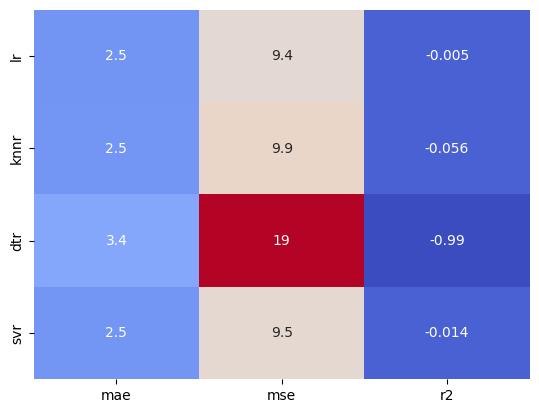

In [ ]:
sns.heatmap(model_table, cmap = 'coolwarm', cbar = False, annot = True)

### Отрицательное значение r2 говорит о том, что независимые переменные в регрессионной модели неэффективно объясняют вариацию зависимой переменной